# Rostros con openCV y entrenamiento
Curso: Aplicaciones del aprendizaje automático con Python <br>
Actividad 4: Entrenamiento para reconocimiento de rostros con openCV <br> <br>

Este código esta basado en el código de Ramiz Raja (https://www.superdatascience.com/opencv-face-recognition/)

En esta actividad se realiza reconocimiento de rostros. Se trabaja desde el entrenamiento de un modelo y se hace una predicción.

Objetivos:
1. Trabajar con funciones
2. Detectar rostros (usando código de la actividad 3, detección de objetos)
3. Leer la base de datos para entrenamiento
4. Entrenar un modelo de clasificación
5. Predecir a cuál clase pertenece una imagen de entrada

Dra. Jessica Beltrán Márquez <br>
www.jessicabeltran.net

### Importar bibliotecas
cv2 - OpenCV <br>
os - Biblioteca para la lectura en directorios <br>
numpy - Biblioteca para calculos numéricos <br>
matplotlib - Biblioteca para graficación

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

### Etiquetas
La base de datos estará etiquetada con carpetas con un número asigado. Sin embargo, cada número corresponde al nombre de una persona. Por ejemplo, la carpeta 1 puede contener fotografías de "Pepe", y la carpeta 2 tener las imágenes de "Juan". 
En el siguiente código se relaciona el número de la carpeta con el nombre real de la persona.

In [25]:
#Si las carpetas de la base de datos no empiezan numeradas en 0, entonces no se coloca un nombre en el índice 0 de la lista.
subjects = ["", "Pepe", "Juan","José","Miguel","Toño","Manuel", "Adrian","Jesús","Adolfo"]
#subjects = ["", "1", "2","3","4","5","6", "7","8","9"]

### Detectar rostros por medio de una función
Este código contiene una parte del código de la actividad 3. 

Se define la función *detect_face* la cual recibe una imagen a color. <br>
Posteriormente se convierte a grises.<br>
Se lee el modelo clasificador *face_cascade* para detectar rostros frontales.<br>
Se utiliza el modelo para detectar rostros en la imagen.<br>
En dado caso que si se haya detectado un rostro se regresan las coordenadas del rectangulo en donde esta presente.<br>
Si no se detecta un rostro no se regresa nada.

In [29]:
def detect_face(img):
    #Se convierte la imagen a escala de grises para ser usada por el detector
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    #Se lee el modelo de clasificador. 
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
 
    #Se detectan rostros y se almacenan en la variable faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
 
    #Si no se detecta rostros se regresa la imagen original
    if (len(faces) == 0):
        return None, None
 
    #Suponemos que solo tendremos un rostro
    #Se extra el área del rostro
    (x, y, w, h) = faces[0]
 
    #Se regresa únicamente la parte del rostro en la imagen
    return gray[y:y+w, x:x+h], faces[0]

# Lectura de la base de datos y preparación de los datos para su entrenamiento
Se define la función *prepare_training_data*. Esta función recibe la dirección que indica la ruta en donde se encuentran las imagenes de entrenamiento.

En nuestro caso la ruta es "./images/traindata"

Si observas la carpeta *traindata* te darás cuenta que esta ordenada de la siguiente manera: <br><br>

traindata<br>

|-------s1<br>
|&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;          |--name1.jpg<br>
|&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;          |--...<br>
|&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;        |--nameN.jpg<br>
|-------s2<br>
|&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;          |--name1.jpg<br>
|&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;          |--...<br>
|&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;          |--nameN.jpg<br>


*data_folder_path* tiene la ruta de las imagenes para entrenamiento.

La función lee todas las carpetas contenidas (s1,s2,..,sn) y recorre dentro de cada carpeta buscando las imagenes. <br>
Lee cada una de las imagenes usando *imread*. <br>
Utiliza la función que declaramos en el input anterior *detect_face* para encontrar el rectángulos en donde está el rostro.<br>
Si existe un rostro en la imagen entonces se agrega a una lista de rostros y una lista que lleva seguimiento de las etiquetas *labels*.

In [30]:
def prepare_training_data(data_folder_path):
    
    #------Paso 1--------
    #Obten las carpetas dentro de la ruta con las imagenes de entrenamiento. Cada carpeta corresponde a un sujeto.
    dirs = os.listdir(data_folder_path)
    
    #Lista que contendrá las caras de todos los sujetos
    faces = []
    #Lista que contendrá las etiquetas de todos los sujetos
    labels = []
    
    # Navegamos a traves de todas las carpetas y leemos las imágenes dentro de cada carpeta
    for dir_name in dirs:
        
        # Las carpetas de cada sujeto empiezan con la letra 's', por lo tanto, cualquier carpeta que no empeza con s se ignora
        if not dir_name.startswith("s"):
            continue;
            
        #------Paso 2--------
        # Se extrae el número de etiqueta del sujeto a partir del nombre de la carpeta
        # Recuerda el formato de la carpeta = slabel
        # Removemos la letra "s" y nos quedamos solo con el número (Esto es la etiqueta)        
        label = int(dir_name.replace("s", ""))
        
        # Construimos la ruta hacia la carpeta que contiene las imagenes del sujeto actual
        # Ejemplo de ruta = "./images/traindata/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #Se obtienen los nombres de las imagenes que estan dentro de cada carpeta
        subject_images_names = os.listdir(subject_dir_path)
        
        #------Paso 3--------
        #Navegamos a través de cada imagen y la leemos
        #detectamos los rostros y los agregamos a la lista
        for image_name in subject_images_names:
            
            #Para ignorar archivos del sistema como .DS_Store
            if image_name.startswith("."):
                continue;
            
            #se construye la ruta de la imagen que se va a leer
            #Ejemplo de ruta = ./images/traindata/s1/1.jpg
            image_path = subject_dir_path + "/" + image_name

            #leer la imagen
            image = cv2.imread(image_path)
                      
            #detección de rostro (usando la función definida arriba)
            face, rect = detect_face(image)
            
            #------Paso 4--------
            #Para propositos de este tutorial
            #se ignoran los rostros que no son detectados
            if face is not None:
                #se agrega el rostro a la lista de rostros
                faces.append(face)
                #se agrega la etiqueta a la lista de etiquetas
                labels.append(label)
                
    return faces, labels

## Se llama la función prepara datos
A continuación, mandamos llamar a la función que acabamos de definir arriba. Le pasamos como parámetro la ruta en donde se encuentran nuestras imagenes de entrenamiento. 

In [31]:
print("Preparando datos...")
faces, labels = prepare_training_data("./images/traindata")
print("Datos preparados")

#Se imprime el total de rostros y etiquetas encontrados
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparando datos...
Datos preparados
Total faces:  63
Total labels:  63


## Reconocimiento de rostros
Primero se indica que algoritmo de reconocimiento se va a utilizar. En el siguiente código hay 3 opciones: <br>

cv2.face.LBPHFaceRecognizer_create()<br>
cv2.face.EigenFaceRecognizer_create()<br>
cv2.face.FisherFaceRecognizer_create()<br>

Puedes elegir cualquiera de ellos y comparar los resultados.


In [32]:
#LBPH face recognizer 
recognizer=cv2.face.EigenFaceRecognizer_create()

#EigenFaceRecognizer (Descomenta la siguiente linea si quieres utilizar este algoritmo)
#face_recognizer = cv2.createEigenFaceRecognizer_create()

#FisherFaceRecognizer (Descomenta la siguiente linea si quieres utilizar este algoritmo)
#face_recognizer = cv2.createFisherFaceRecognizer_create()

### Entrenamiento
En la siguiente linea de código se lleva a cabo el entrenamiento. Estamos utilizando el reconocer de rostro que elegimos y recibe como parámetros las lista con los rostros y las etiquetas que obtuvimos en la función de preparación de datos.

In [38]:
#Entrena un reconocedor de rostros con las caras de entrenamiento
face_recognizer.train(faces, np.array(labels))z

SyntaxError: invalid syntax (<ipython-input-38-41660d8c58cc>, line 2)

### Dibujar las regiones con rostro
Las siguiente funcion *draw_rectangle* nos ayudarán a dibujar un rectángulo sobre la imagen original en donde indique en que parte de la imagen se encuentra el rostro.

La siguiente función *draw_text* nos va a colocar el nombre del sujeto que se predijo. Recuerda que arriba definimos los nombres de los sujetos en subjects = ["", "Pepe", "Juan","José","Miguel","Toño","Manuel", "Adrian","Jesús","Adolfo"].

Si se predijo que una imagen pertenece a la clase con la etiqueta 2, entonces esta función va a colocar el nombre de "Juan"



In [39]:
# fucnión para dibujar un rectángulo en la imagen de acuerdo a las coordenadas (x,y) dadas 
# con la altura y anchura width and height
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# función para dibujar texto en una imagen dada empezando desde las coordenadas (x,y) pasadas
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

## Predicción
En la siguiente función se lleva a cabo la predicción.

La función recibe una imagen de entranda, detecta el rostro usando la función *detect_face*. A continuación se utiliza la el reconocedor de rostros.

Recuerda que el reconocedor de rostros *face_recognizer* ya fue entrenado. Esto quiere decir que ya tiene un modelo el cual solo va a evaluar. Se hace una predicción sobre un segmento de la imagen de prueba que solo contiene al rostro encontrado por la función *detect_face*.

El reconocedor de rostro regresa la etiqueta *label* a la cual pertenece el sujeto. Gracias a la lista que definimos en un inicio (subjects = ["", "Pepe", "Juan","José","Miguel","Toño","Manuel", "Adrian","Jesús","Adolfo"]) podemos saber el nombre del sujeto.

Lo siguiente consiste en dibujar un rectángulo sobre el rostro y el nombre del sujeto.

A continuación se prueba todo el código haciendo 2 predicciones.
En este caso probamos con 2 imagenes que provienen del sujeto 1 y 2 respectivamente.

In [48]:
def predict(test_img):
    #Hacemos una copia para no modificar la imagen original
    img = test_img.copy()
    #Se detecta el rostro de la imagen
    face, rect = detect_face(img)

    #Se predice a que etiqueta pertenece la imagen usando el reconocedor
    (label,confidence)= face_recognizer.predict(face)
    #Se obtiene el nombre del sujeto dada la etiqueta predicha
    label_text = "pepe"
    
    #Se dibuja un rectangulo en donde esta contenido el rostro
    draw_rectangle(img, rect)
    #Se coloca el nombre de la persona
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

Prediciendo imagenes...
Predicción completa


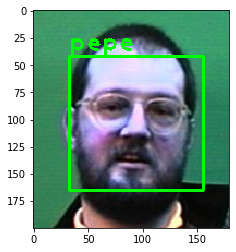

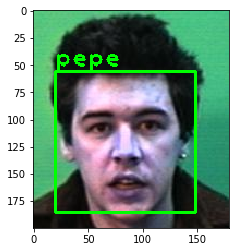

In [49]:
print("Prediciendo imagenes...")

#Cargar imagenes de prueba
test_img1 = cv2.imread("./images/testdata/s1/9326871.15.jpg")
test_img2 = cv2.imread("./images/testdata/s2/9332898.16.jpg")

#Predecir
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
print("Predicción completa")


#Desplegar imágenes
plt.imshow(predicted_img1)
plt.show()
plt.imshow(predicted_img2)
plt.show()


Este código se baso en: <br>
https://www.superdatascience.com/opencv-face-recognition/ <br>
https://github.com/informramiz/opencv-face-recognition-python/blob/master/OpenCV-Face-Recognition-Python.ipynb

La base de datos es un extracto de la base de datos de "Computer Vision Science Reserach Projects de Dr. Libor Spacek", Collection of facial images: Faces94. <br>
http://cswww.essex.ac.uk/mv/allfaces/faces94.html

<span style="color:magenta">__Pruébalo__:</span> Toma fotografías parecidas al conjunto de datos mostrado de al menos 3 compañeros tuyos y tu. Arma un conjunto de datos propio con datos de entrenamiento y de evaluación y prueba los resultados.